In [3]:
library(datasets)
data(iris)
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [2]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Here the inbuilt dataset of Iris is used

In [4]:
install.packages("RColorBrewer")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'RColorBrewer' is in use and will not be installed"

In [5]:
install.packages("cluster")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'cluster' is in use and will not be installed"

In [3]:
library(randomForest)
library(caret)
library(cluster)
library(RColorBrewer)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.2"
Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



# Supervised Random Forest

In [8]:
holdout=sample(1:150,50)
myColRamp=colorRampPalette(colors=c("#25591f","#818c3c","#72601b"))

Assigned color to each type of class

In [9]:
holdout
#some random numbers to select trandom sample

[1]   6 128 148  39 102  62  26  35 107  36  50  87 129  54  10  96 116 136  20
[20] 105  82  74  29  89 120  33 110  99  45  66  42  90  70  14  97  55  91  58
[39]  28  67 114 119 135  44   5  48  25 134  69  63

In [11]:
rf=randomForest(x=iris[-holdout,-5],y=iris$Species[-holdout],mtry=2,ntree=2000,proximity=TRUE)
rf


Call:
 randomForest(x = iris[-holdout, -5], y = iris$Species[-holdout],      ntree = 2000, mtry = 2, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 2000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 3%
Confusion matrix:
           setosa versicolor virginica class.error
setosa         32          0         0  0.00000000
versicolor      0         31         1  0.03125000
virginica       0          2        34  0.05555556

•Creating a random forest model based on seen data.

•We are excluding the holdout data from it for training.

•2000 trees were taken into consideration and at each split 2 variables were tried.

•From the confusion matrix, we can see 3 observations were labeled incorrect on training data.

In [21]:
install.packages("e1071")

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\abine\AppData\Local\Temp\Rtmpuy8YIa\downloaded_packages


In [23]:
library("e1071")

Warning message:
"package 'e1071' was built under R version 3.6.3"

In [24]:
y_predicted=predict(rf,iris[holdout,-5])
df1=data.frame(Orig=iris$Species[holdout],Pred=y_predicted)
head(df1)
confusionMatrix(table(df1$Orig,df1$Pred))

,Orig,Pred
,<fct>,<fct>
6,setosa,setosa
128,virginica,virginica
148,virginica,virginica
39,setosa,setosa
102,virginica,virginica
62,versicolor,versicolor


Confusion Matrix and Statistics

            
             setosa versicolor virginica
  setosa         18          0         0
  versicolor      0         18         0
  virginica       0          4        10

Overall Statistics
                                          
               Accuracy : 0.92            
                 95% CI : (0.8077, 0.9778)
    No Information Rate : 0.44            
    P-Value [Acc > NIR] : 9.624e-13       
                                          
                  Kappa : 0.878           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                   1.00            0.8182           1.0000
Specificity                   1.00            1.0000           0.9000
Pos Pred Value                1.00            1.0000           0.7143
Neg Pred Value                1.00            0.8750           1.0000
Prevalence

Now, The model is tested on the holdout dataset.

•We can see that the model has made 4 incorrect predictions on the testing data.


# UNSUPERVISED RANDOM FOREST CLUSTERING

In [25]:
rf2=randomForest(x=iris[,-5],mtry=2,ntree=2000,proximity=TRUE)
rf2


Call:
 randomForest(x = iris[, -5], ntree = 2000, mtry = 2, proximity = TRUE) 
               Type of random forest: unsupervised
                     Number of trees: 2000
No. of variables tried at each split: 2


•	Creating a random forest model based on unseen data.

•	2000 trees were taken into consideration and at each split 2 variables were tried.

In [26]:
prox=rf2$proximity
head(prox)
pam.rf=pam(prox,3)
pred=cbind(pam.rf$clustering,iris$Species)
table(pred[,2],pred[,1])

,1,2,3,4,5,6,7,8,9,10,...,141,142,143,144,145,146,147,148,149,150
1,1.0000000,0.22471910,0.26258993,0.17808219,0.7518797,0.23880597,0.3560606,0.6028369,0.09920635,0.17562724,...,0,0,0,0,0,0,0,0,0,0
2,0.2247191,1.00000000,0.40225564,0.41947566,0.2769231,0.03597122,0.2248996,0.2588652,0.38697318,0.50922509,...,0,0,0,0,0,0,0,0,0,0
3,0.2625899,0.40225564,1.00000000,0.42066421,0.2916667,0.02348993,0.4592593,0.2862191,0.22656250,0.34444444,...,0,0,0,0,0,0,0,0,0,0
4,0.1780822,0.41947566,0.42066421,1.00000000,0.1704545,0.05035971,0.4065041,0.3241379,0.38339921,0.54789272,...,0,0,0,0,0,0,0,0,0,0
5,0.7518797,0.27692308,0.29166667,0.17045455,1.0000000,0.29277567,0.4250000,0.6466431,0.11065574,0.24632353,...,0,0,0,0,0,0,0,0,0,0
6,0.2388060,0.03597122,0.02348993,0.05035971,0.2927757,1.00000000,0.1338583,0.2206897,0.00754717,0.05208333,...,0,0,0,0,0,0,0,0,0,0


   
     1  2  3
  1 49  1  0
  2  0 49  1
  3  0 15 35

•Proximity values in the matrix represent the similarity among the object of the matrix.

•Thus on the basis of the proximity values, the clustering are formed where higher the proximity value, the more similar the objects are among them.

•We can see that 17 incorrect predictions have been made.

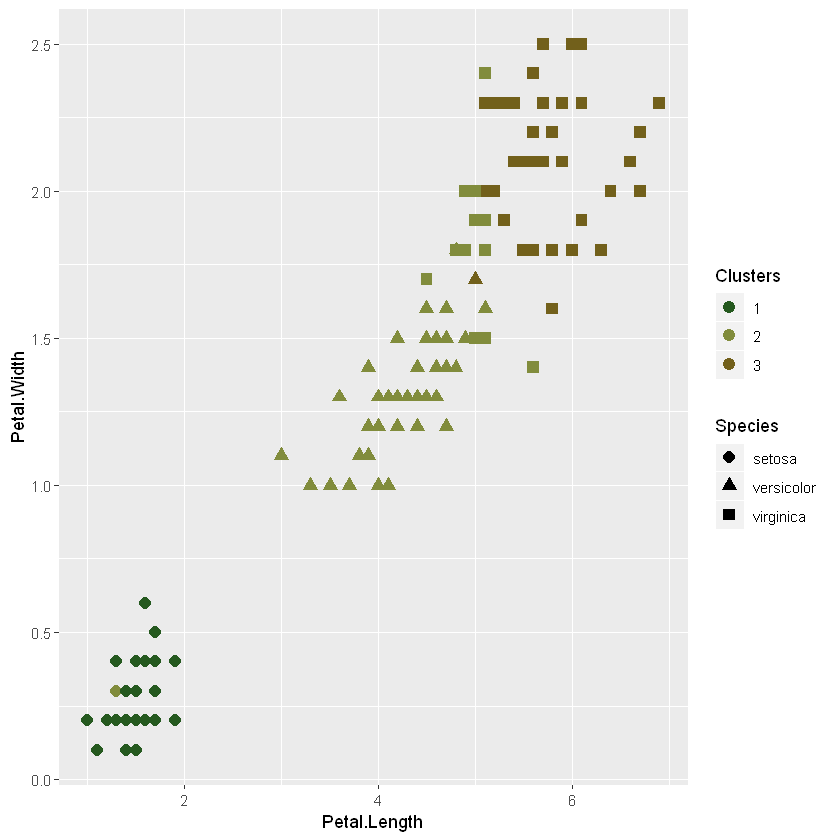

In [28]:
Clusters=as.factor(pam.rf$cluster)
Species=iris$Species
ggplot(iris,aes(x=Petal.Length,y=Petal.Width,col=Clusters,pch=Species))+geom_point(size=3)+scale_color_manual(values=myColRamp(3))

Visual representation of the clusters

# COMPARISON with straight kmeans and PAM

In [30]:
xiris=scale(iris[,-5])
km=kmeans(xiris,3,nstart=200)
pred.km=cbind(km$cluster,iris$Species)
table(pred.km[,2], pred.km[,1])

   
     1  2  3
  1  0 50  0
  2 11  0 39
  3 36  0 14

•	Normalizing the dataset using the scale function.

•	Using k-means for clustering unseen data.

•	We can see that the model has 136 incorrect predictions which is absurd.


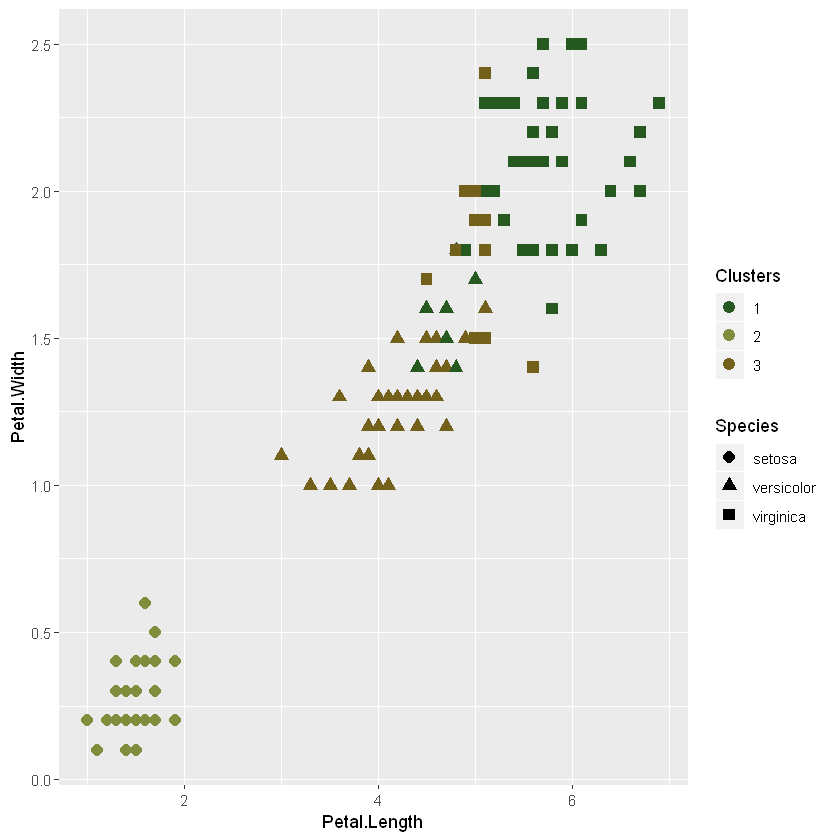

In [31]:
Clusters <- as.factor(km$cluster)
Species <- iris$Species
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, col = Clusters, pch = Species)) + geom_point(size = 3) + 
  scale_color_manual(values = myColRamp(3))

Visual representation of the clusters 

In [32]:
pm <- pam(xiris, 3)
pred.pm <- cbind(pm$clustering, iris$Species)
table(pred.pm[,2], pred.pm[,1])

   
     1  2  3
  1 50  0  0
  2  0  9 41
  3  0 36 14

•Using pam function for clustering the unseen dataset.
    
•We can see that the model has 77 incorrect predictions.

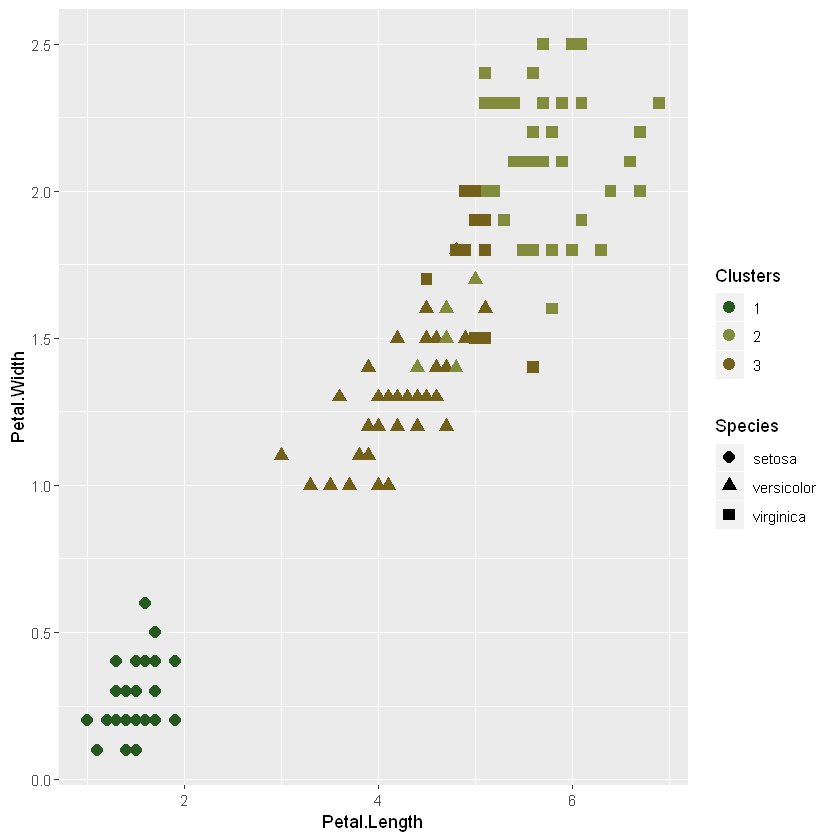

In [33]:
Clusters <- as.factor(pm$cluster)
Species <- iris$Species
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, col = Clusters, pch = Species)) + geom_point(size = 3) + 
  scale_color_manual(values = myColRamp(3))

Visual representation of the clusters

## CONCLUSION

kmeans incoerrectly allocates 25 observations

PAM incorrectly allocates 23 Observations and

Random Forest incorrectly allocates 18

Here random forest model does a little better at clustering